In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
import Double_Null_utils as dnu
from scipy import optimize
import tables
import h5py



/home/brandon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
uscal=1
vscal=1

If hd5 is used, uscal and vscal reduce arrays by their value in order to prevent memory overflow. Use when h5 files are very large (i.e. >2gB)

In [3]:
#rnp=np.load('rnp.npy')
#signp=np.load('sig.npy')
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]



In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)
    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
print(str(rnp.nbytes)+" bytes")

26880000 bytes


In [5]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]


[3.36500000e+06 6.73000000e+02 5.00000000e+03 2.50000000e+00
 1.33333333e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00]
N=3365000


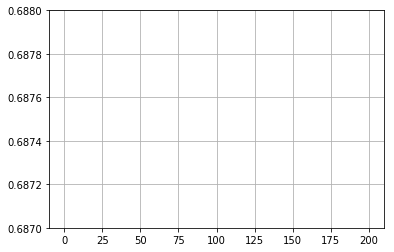

In [6]:
for line in rnp[::100]:
    plt.plot(vrange,line)
plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
plt.ylim(.687,.688)    
plt.grid()
plt.show()

/home/brandon/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/home/brandon/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


ValueError: Specified levels [1.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0] don't match available levels [ 5. 10. 15. 20. 25.]

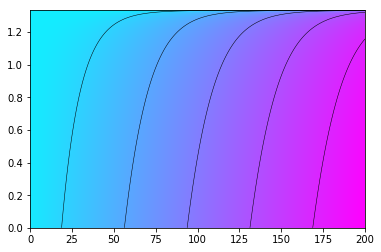

In [7]:
levels=np.arange(5.0, np.nanmax(rnp), 5.0 )
levels=np.arange(5.0, 100, 5.0 )
if Q==0.0:
     levels=np.insert(levels,0,[1.0])
if Q>0.0:
    levels=np.insert(levels,0,[rminus,rminus+.01,.7,1.0])



plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(rnp),cmap=plt.cm.cool,vmin=0.0,vmax=np.nanmax(rnp))
plot4=plt.contour(vrange,urange,np.ma.masked_invalid(rnp),levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,np.ma.masked_invalid  (rnp), [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levels, inline=0, inline_spacing=0, fmt='%1.2f',rightside_up=True, fontsize=8)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

In [ ]:
#levels=np.arange(5.0, np.nanmax(signp), 5.0 )
#levels=np.arange(5.0, 100, 5.0 )
#if Q==0.0:
     #levels=np.insert(levels,0,[1.0])
#if Q>0.0:
    #levels=np.insert(levels,0,[rminus,rminus+.01,.7,1.0])



plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(signp),cmap=plt.cm.cool,vmin=np.nanmin(signp),vmax=np.nanmax(signp))
#plot4=plt.contour(vrange,urange,np.ma.masked_invalid(signp),levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,np.ma.masked_invalid(rnp), [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#plt.clabel(plot4, levels, inline=0, inline_spacing=0, fmt='%1.2f',rightside_up=True,fontsize=8)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Sigma vs (u,v) Coordinates')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

In [ ]:
print(len(rnp[0]))

In [ ]:
print(umax)

In [ ]:
plt.plot(urange,rnp[:,0])
plt.show()
#print(np.polyfit(urange,rnp[:,0],2.0))
plt.plot(vrange,rnp[0,:])
plt.show()
print(np.polyfit(vrange,rnp[0,:],2.0))

In [ ]:
print(Nu,Nv)

u4=40
v4=1750

print(urange[u4],vrange[v4])

In [ ]:
dru=np.zeros((Nu-1))

for i in range(0,Nu-1):
    dru[i]=(rnp[i+1][v4]-rnp[i][v4])/(urange[i+1]-urange[i])
plt.plot(np.delete(urange,0),np.abs(dru))
plt.yscale('log')
plt.ylabel('|r,u|')
plt.xlabel('u')
plt.show()



In [ ]:
drv=np.zeros((Nv-1))

for j in range(0,Nv-1):
    drv[j]=(rnp[u4][j+1]-rnp[u4][j])/(vrange[j+1]-vrange[j])
plt.plot(np.delete(vrange,0),np.abs(drv))
plt.yscale('log')
plt.ylabel('|r,v|')
plt.xlabel('v')
plt.show()


In [ ]:
r=rnp[u4][v4]
print(r)
print(dru[u4],drv[v4],mth.exp(-signp[u4][v4]))
print(dru[u4]*drv[v4]*mth.exp(-signp[u4][v4]))
print(-1/4*(1-2*M0/r+Q**2/r**2))

In [ ]:
r=rnp[u4][v4]
print("M="+str((1.0+4.0*np.exp(-signp[u4][v4])*dru[u4]*drv[v4])*r/2+Q**2.0/(2.0*r)))
print(massnp[u4][v4])

In [ ]:
print(rnp[u4+1][v4],rnp[u4][v4])
print(rnp[u4+1][v4]-rnp[u4][v4])
print(urange[u4+1],urange[u4])
print(urange[u4+1]-urange[u4])

In [ ]:
print(rnp)